# Scraping Books to Scrape with BeautifulSoup

In [6]:
# import librairies
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import sqlite3

## Downloading the webpage

In [7]:
url = 'https://books.toscrape.com'

In [8]:
response = requests.get(url)

In [9]:
page_contents = response.text

In [10]:
#Creating a file and loading the page contents in it.
with open('Bookswebpage.html','w') as f:
    f.write(page_contents)

## Parse and extract informations with beautifulSoup

In [11]:
doc = BeautifulSoup(page_contents,'html.parser')

In [12]:
doc

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

## Grabbing book titles

In [13]:
# function for grabs books titles on one page.
def get_book_titles(doc):
    Book_title_tags = doc.find_all('h3')
    Book_titles = []
    for tags in Book_title_tags:
        Book_titles.append(tags.text)
    return Book_titles

In [14]:
get_book_titles(doc)[0:3]

['A Light in the ...', 'Tipping the Velvet', 'Soumission']

## Grabbing book prices

In [15]:
# function for grabs book price on one page.
def get_book_price(doc):
    Book_price_tags = doc.find_all('p', class_ = 'price_color')
    Book_price = []
    for tags in Book_price_tags:
        Book_price.append(tags.text.replace('Â',''))
    return Book_price

In [16]:
get_book_price(doc)[0:3]

['£51.77', '£53.74', '£50.10']

## Grabbing stock availability

In [17]:
# function for grabs book availability on one page.
def get_stock_availability(doc):
    Book_stock_tags = doc.find_all('p', class_ = 'instock availability')
    Book_stock = []
    for tags in Book_stock_tags:
        Book_stock.append(tags.text.strip())
    return Book_stock

In [18]:
get_stock_availability(doc)[0:3]

['In stock', 'In stock', 'In stock']

## Grabbing rating

In [19]:
# function for grabs book raiting on one page.
def get_rating(doc):
    
    Book_rating_tags = doc.find_all('p', class_="star-rating")
    Book_rating = []
    #print(Book_raiting_tags)
    for tags in Book_rating_tags:
        Book_rating.append(tags.get('class')[1])
    return Book_rating

In [20]:
get_rating(doc)[0:3]

['Three', 'One', 'One']

## Grabbing all at once

In [21]:
# function for convert string number to int number
def string_to_number(str):
    number_dict = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5}
    return number_dict[str]
    

In [22]:
print_1_pod = doc.find_all('article', class_="product_pod")[0]
print_1_pod

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [23]:
# function for grabs titles, prices, availabilities, raitings and image links
def all_info(doc):
    
    product_pods = doc.find_all('article', class_="product_pod")
    pod_dict = []
    
    for pod in product_pods:
        
        title = pod.find('h3').text
        price = float(pod.find('p', class_ ='price_color').text.replace('Â£',''))
        availability = pod.find('p', class_='instock availability').text.strip()
        rating = string_to_number(pod.find('p', class_="star-rating").get('class')[1])
        image_link = pod.find('img').get('src')
        pod_dict.append({'title': title, 'price_pound': price, 'availability': availability, 'rating': rating, 'image_link': image_link})
        
   
    return pod_dict
    

In [24]:
books_info =all_info(doc)

In [25]:
# Convert dict with books info in dataframe
books_info = pd.DataFrame(books_info)

In [26]:
books_info.head(5)

,title,price_pound,availability,rating,image_link
0,A Light in the ...,51.77,In stock,3,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...
1,Tipping the Velvet,53.74,In stock,1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...
2,Soumission,50.10,In stock,1,media/cache/3e/ef/3eef99c9d9adef34639f51066202...
3,Sharp Objects,47.82,In stock,4,media/cache/32/51/3251cf3a3412f53f339e42cac213...
4,Sapiens: A Brief History ...,54.23,In stock,5,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...


## Collecting data from multiple pages

In [27]:
def get_doc(url):
    response = requests.get(url)
    doc = BeautifulSoup(response.text,'html.parser')
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(response))
    return doc

In [28]:
# function for grabs info on multiple pages
def scrape_multiple_pages(n):
    URL = 'https://books.toscrape.com/catalogue/page-'
    titles,prices,stocks_availability,rating = [],[],[],[]
    
    for page in range(1,n+1):
        doc = get_doc(URL + str(page)+ '.html')
        titles.extend(get_book_titles(doc))
        prices.extend(get_book_price(doc))
        stocks_availability.extend(get_stock_availability(doc))
        rating.extend(get_rating(doc))
        
# a variable book_dict1 is created to store the information as dictionary
# scraped information is stored into Pandas DataFrame.
    book_dict1 = {
                'TITLE':titles,
                'PRICE':prices,
                'STOCK AVAILABILTY':stocks_availability,
                'RATING':rating}
    return pd.DataFrame(book_dict1)

In [29]:
scrape_multiple_pages(50)

,TITLE,PRICE,STOCK AVAILABILTY,RATING
0,A Light in the ...,£51.77,In stock,Three
1,Tipping the Velvet,£53.74,In stock,One
2,Soumission,£50.10,In stock,One
3,Sharp Objects,£47.82,In stock,Four
4,Sapiens: A Brief History ...,£54.23,In stock,Five
...,...,...,...,...
995,Alice in Wonderland (Alice's ...,£55.53,In stock,One
996,"Ajin: Demi-Human, Volume 1 ...",£57.06,In stock,Four
997,A Spy's Devotion (The ...,£16.97,In stock,Five
998,1st to Die (Women's ...,£53.98,In stock,One


In [30]:
# seconde function for grabs info on multiple pages with a second methode
def all_info_multi_pages(n):
    URL = 'https://books.toscrape.com/catalogue/page-'
    pod_dict = []
    
    for page in range(1,n+1):
        doc = get_doc(URL + str(page)+ '.html')
        pod_dict.extend(all_info(doc))
    

    return pd.DataFrame(pod_dict)

In [31]:
books_info = all_info_multi_pages(50)

The two functions work, the second is an improvement of the first.

# Creating a CSV file

In [45]:
#conversion of information stored to a CSV
#serial numbers or the index values are removed using index = None
all_info_multi_pages(50).to_csv('books_infos.csv',index = None)

KeyboardInterrupt: 

# Data analyse

In [33]:
books_info.head()

,title,price_pound,availability,rating,image_link
0,A Light in the ...,51.77,In stock,3,../media/cache/2c/da/2cdad67c44b002e7ead0cc356...
1,Tipping the Velvet,53.74,In stock,1,../media/cache/26/0c/260c6ae16bce31c8f8c95dadd...
2,Soumission,50.10,In stock,1,../media/cache/3e/ef/3eef99c9d9adef34639f51066...
3,Sharp Objects,47.82,In stock,4,../media/cache/32/51/3251cf3a3412f53f339e42cac...
4,Sapiens: A Brief History ...,54.23,In stock,5,../media/cache/be/a5/bea5697f2534a2f86a3ef27b5...


In [34]:
books_info.describe()

,price_pound,rating
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


<AxesSubplot: >

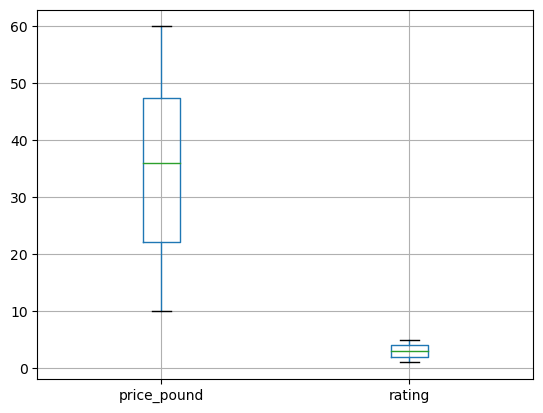

In [35]:
books_info.boxplot()

This website has 1000 books in its catalog.
The cheapest book costs 10 euros and the most expensive 60 euros with an average of 35 euros. 
Ratings range from 1 to 5 stars with an average of 2.9 stars.

In [36]:
books_info.hist()

array([[<AxesSubplot: title={'center': 'price_pound'}>,
        <AxesSubplot: title={'center': 'rating'}>]], dtype=object)

With the histograms we can see that the frequency of prices and ratings are evenly distributed.
With a slight majority for the 1 star ratings and for the prices between 35 and 40 euros.

In [37]:
books_info.groupby('rating').mean() 

,price_pound
rating,
1,34.561195
2,34.810918
3,34.692020
4,36.093296
5,35.374490


In [38]:
books_info.corr()

,price_pound,rating
price_pound,1.000000,0.028166
rating,0.028166,1.000000


Book price and book scores are independent, there is no correlation between these two features.

In [39]:
books_info.availability.unique()

array(['In stock'], dtype=object)

All books are available.

In [40]:
books_info.query('price_pound == 59.99')

,title,price_pound,availability,rating,image_link
648,The Perfect Play (Play ...,59.99,In stock,3,../media/cache/40/16/4016ffba678f309171d813013...


In [41]:
books_info['title'].loc[648]

'The Perfect Play (Play ...'

In [42]:
books_info.query('price_pound == 10')

,title,price_pound,availability,rating,image_link
638,An Abundance of Katherines,10.0,In stock,5,../media/cache/ed/45/ed4517339d4780f4158c485c8...


Le livre le plus chère est The Perfect Play et le livre le moins chère est An Abundance of Katherines.

# Creating database

In [43]:
conn = sqlite3.connect('database.db')

In [44]:
books_info.to_sql('book', conn, if_exists='replace')

conn.close()